The Source of data is kaggle and data can be downloaded from the kaggle link "https://www.kaggle.com/c/msdchallenge/data"

In [71]:
#importing necessary libraries needed for Exploratory Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

reading the data that have details of the songs

In [2]:
songs = pd.read_csv('C:/Users/Pundareek/Downloads/ISB/Residency 4/ML UL 2/Million Song Dataset/kaggle_songs.txt', sep=" ", header=None)
songs.columns = ["Song-Id", "SLNO"]

In [3]:
songs.head(5)

,Song-Id,SLNO
0,SOAAADD12AB018A9DD,1
1,SOAAADE12A6D4F80CC,2
2,SOAAADF12A8C13DF62,3
3,SOAAADZ12A8C1334FB,4
4,SOAAAFI12A6D4F9C66,5


In [4]:
songs.count()

Song-Id    386213
SLNO       386213
dtype: int64

as we could see above total 386213 songs are listed in the songs data set

In [5]:
songs.drop('SLNO',inplace=True,axis=1)

In [6]:
songs.head(5)

,Song-Id
0,SOAAADD12AB018A9DD
1,SOAAADE12A6D4F80CC
2,SOAAADF12A8C13DF62
3,SOAAADZ12A8C1334FB
4,SOAAAFI12A6D4F9C66


reading users details

In [7]:
users = pd.read_csv('C:/Users/Pundareek/Downloads/ISB/Residency 4/ML UL 2/Million Song Dataset/kaggle_users.txt', sep=" ", header=None)
users.columns = ["User-Id"]

In [8]:
users.head(5)

,User-Id
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d
1,d7083f5e1d50c264277d624340edaaf3dc16095b
2,d68dc6fc25248234590d7668a11e3335534ae4b4
3,9be82340a8b5ef32357fe5af957ccd54736ece95
4,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8


Reading data that have details of SONG-USER-COUNT of time the song is been listened/

In [9]:
listen = pd.read_csv('C:/Users/Pundareek/Downloads/ISB/Residency 4/ML UL 2/Million Song Dataset/kaggle_visible_evaluation_triplets.txt', sep="\t", header=None)
listen.columns = ["User-Id","Song-Id","ListenCount"]

In [10]:
listen['ListenCount'].max()

923

as we could see above a song for max is listened by 923 times by a user.

# EDA on the dataset

Plotting and seeing how many different songs are been listeened by a user.

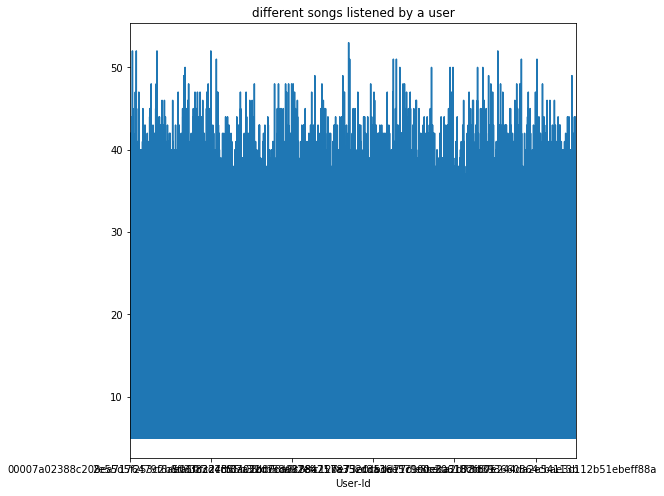

In [11]:
plt.figure(figsize=(8,8))
listen_user = listen.groupby('User-Id').size()
listen_user.plot(kind='line',stacked=True, title= 'different songs listened by a user')

In [12]:
listen_user = listen.groupby('User-Id').size().reset_index(name = 'occur')

In [13]:
listen_user.head()

,User-Id,occur
0,00007a02388c208ea7176479f6ae06f8224355b3,9
1,00014a76ed063e1a749171a253bca9d9a0ff1782,11
2,00015189668691680bb1a2e58afde1541ec92ced,17
3,0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,9
4,00020fcd8b01986a6a85b896ccde6c49f35142ad,32


In [14]:
listen_user=listen_user.sort_values(by='occur', ascending=False)

Displaying the data in tabular format, and could see and observe that user "7d90be8dfdbde170f036ce8a4b915440137cb11c", 
had listened maximum on 53 different songs

In [15]:
listen_user.head(20)

,User-Id,occur
53921,7d90be8dfdbde170f036ce8a4b915440137cb11c,53
90678,d30e18323f15426c3cdc8585252ed34459916f51,52
1597,03ad93fdb01506ce205f4708decf8e4b1ae90fff,52
19962,2e424b28bff1f62a2dae22a918f09f9c30c06d1b,52
643,016a24e91a72c159a5048ab1b9b2ba5ce761b526,52
6694,0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90,52
96486,e08848e92427e9ef8add59a1264c484e1078d5a5,51
64941,9769ebffc543fa42b58daf6f52f8816abf5f408e,51
54171,7e27789eae69bc946c51833c0b833a49c58ed9ed,51
65684,992fea335363e87217e1b052fd7380b3fd7e35b4,51


for our recommentation system we are only selecting users those have listened to more than 30 songs

In [17]:
listen_user = listen_user[(listen_user.occur >= 30)]

In [18]:
listen_user.head(5)

,User-Id,occur
53921,7d90be8dfdbde170f036ce8a4b915440137cb11c,53
90678,d30e18323f15426c3cdc8585252ed34459916f51,52
1597,03ad93fdb01506ce205f4708decf8e4b1ae90fff,52
19962,2e424b28bff1f62a2dae22a918f09f9c30c06d1b,52
643,016a24e91a72c159a5048ab1b9b2ba5ce761b526,52


In [19]:
listen_user.drop('occur',inplace=True,axis=1)

In [20]:
listen_user.head(5)

,User-Id
53921,7d90be8dfdbde170f036ce8a4b915440137cb11c
90678,d30e18323f15426c3cdc8585252ed34459916f51
1597,03ad93fdb01506ce205f4708decf8e4b1ae90fff
19962,2e424b28bff1f62a2dae22a918f09f9c30c06d1b
643,016a24e91a72c159a5048ab1b9b2ba5ce761b526


total 5953 users are been considered for creating the recommendation system.

In [21]:
listen_user.count()

User-Id    5953
dtype: int64

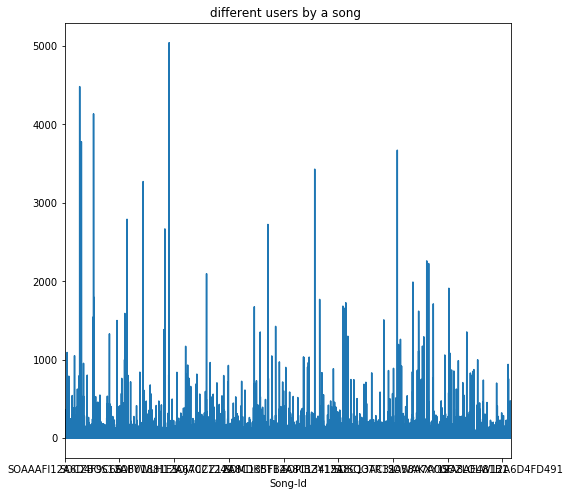

In [22]:
plt.figure(figsize=(8,8))
listen_song = listen.groupby('Song-Id').size()
listen_song.plot(kind='line',stacked=True, title= 'different users by a song ')

In [23]:
listen_song = listen.groupby('Song-Id').size().reset_index(name = 'occur')

In [24]:
listen_song=listen_song.sort_values(by='occur', ascending=False)

Below is the list of top 20 songs most favourite songs, the song "7d90be8dfdbde170f036ce8a4b915440137cb11c", is listened by 5043 users.
For a user who is new to the system can be recommeneded with this most favourite rong list.

In [25]:
listen_song.head(20)

,Song-Id,occur
38185,SOFRQTD12A81C233C0,5043
5478,SOAUWYT12A81C206F1,4483
10546,SOBONKR12A58A7A7E0,4136
6096,SOAXGDH12A8C13F8A1,3780
121599,SOSXLTC12AF72A7F54,3672
91409,SONYKOW12AB01849C9,3430
28684,SOEGIYH12A6D4FC0E3,3272
22787,SODJWHY12A8C142CCE,2791
74297,SOLFXKT12AB017E3E0,2725
36622,SOFLJQZ12A6D4FADA6,2668


For our recommendation system selecting only those sings those are been listened at least 50 users.

In [26]:
listen_song = listen_song[(listen_song.occur >= 50)]

 As we can see below total 4811 songs are such songs those are been listened by atleast 50 users.

In [27]:
listen_song['Song-Id'].count()

4811

In [28]:
listen_song.head(5)

,Song-Id,occur
38185,SOFRQTD12A81C233C0,5043
5478,SOAUWYT12A81C206F1,4483
10546,SOBONKR12A58A7A7E0,4136
6096,SOAXGDH12A8C13F8A1,3780
121599,SOSXLTC12AF72A7F54,3672


In [29]:
listen_song.drop('occur',inplace=True,axis=1)

In [30]:
listen_song.head(5)

,Song-Id
38185,SOFRQTD12A81C233C0
5478,SOAUWYT12A81C206F1
10546,SOBONKR12A58A7A7E0
6096,SOAXGDH12A8C13F8A1
121599,SOSXLTC12AF72A7F54


the above checks on songs and user ID are been put because of hardware issue, we would be recommending songs only to the user who has listened more than 30 songs, and songs those are been in consideration are the onces listened atleast by 50 different users.

below are are putting the join between SONG dataset and USER dataset with our selected records just to make sure data extracted re valid one and is present in the master dataset

In [31]:
song_merge = pd.merge(left=listen_song, right=songs, left_on='Song-Id', right_on='Song-Id')

In [32]:
song_merge.count()

Song-Id    4811
dtype: int64

In [33]:
song_merge.head(5)

,Song-Id
0,SOFRQTD12A81C233C0
1,SOAUWYT12A81C206F1
2,SOBONKR12A58A7A7E0
3,SOAXGDH12A8C13F8A1
4,SOSXLTC12AF72A7F54


In [34]:
user_merge = pd.merge(left=listen_user, right=users, left_on='User-Id', right_on='User-Id')

In [35]:
user_merge.count()

User-Id    5953
dtype: int64

In [36]:
user_merge.head(5)

,User-Id
0,7d90be8dfdbde170f036ce8a4b915440137cb11c
1,d30e18323f15426c3cdc8585252ed34459916f51
2,03ad93fdb01506ce205f4708decf8e4b1ae90fff
3,2e424b28bff1f62a2dae22a918f09f9c30c06d1b
4,016a24e91a72c159a5048ab1b9b2ba5ce761b526


after the corss validation, putting the joing of extracted SONG annd USERID with the listened song details list to see the finl extracted records those would be used forl our recommenataion.
we coudl see below that the extracted records count are 83741

In [37]:
first_merge = pd.merge(left=listen, right=user_merge, left_on='User-Id', right_on='User-Id')

In [38]:
reco_data = pd.merge(left=first_merge, right=song_merge, left_on='Song-Id', right_on='Song-Id')

In [39]:
reco_data.count()

User-Id        83741
Song-Id        83741
ListenCount    83741
dtype: int64

In [40]:
reco_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83741 entries, 0 to 83740
Data columns (total 3 columns):
User-Id        83741 non-null object
Song-Id        83741 non-null object
ListenCount    83741 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


below is the code for making songs recommentdations, we are using USER based collaborative filtering for our recommendation system.

In [42]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise import KNNBasic
from surprise.model_selection import train_test_split

from collections import defaultdict
import heapq

In [43]:
from matplotlib import pyplot as plt
%matplotlib inline

Below is the count of users those we have in our data. and to be used for creating the recommendation system for these users.

In [49]:
print("The number of users is {}".format(reco_data['User-Id'].nunique()))

The number of users is 5896


Below is the count of songss those we have in our data to be used for creating the recommendation system. and only these songs would only be recommended to the users of our data.

In [50]:
print("The number of songs is {}".format(reco_data['Song-Id'].nunique()))

The number of songs is 4810


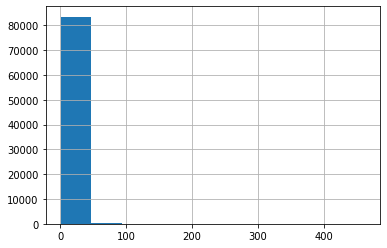

In [51]:
reco_data['ListenCount'].hist(grid=True)

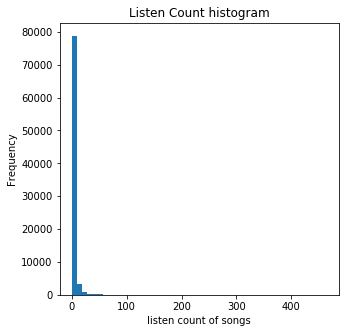

In [52]:
####### Plotting histogram  for listen Count
plt.figure(figsize=(5,5))
x = reco_data['ListenCount']
plt.hist(x, bins = 50)
plt.title('Listen Count histogram')
plt.xlabel('listen count of songs')
plt.ylabel('Frequency')
plt.show()

For our system we are taking the listen count as the ratings, since the listen count is invariably distributed from 1 to 463, we are normalising this count in ratings in scale 1 to 5.
if listen count = 1, then rating = 1
if listen count = 2, then rating = 2
if listen count = 3 to 5, then rating = 3
if listen count = 6 to 10, then rating = 4
if listen count > 10, then rating = 5

In [53]:


for i in reco_data.index:
    if (reco_data.at[i, "ListenCount"] == 1):
        reco_data.at[i, "ListenCount"] = 1
    elif (reco_data.at[i, "ListenCount"] == 2):
        reco_data.at[i, "ListenCount"] = 2
    elif (reco_data.at[i, "ListenCount"] in range(2,6)):
        reco_data.at[i, "ListenCount"] = 3
    elif (reco_data.at[i, "ListenCount"] in range(5,11)):
        reco_data.at[i, "ListenCount"] = 4
    else:
        reco_data.at[i, "ListenCount"] = 5

After Normalising the listen count into rating checking its distribution

In [54]:
dataana = reco_data.groupby('ListenCount').size().reset_index(name = 'occur')

In [55]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(reco_data[['User-Id','Song-Id','ListenCount']], reader)

In [56]:
dataana.head(30)


,ListenCount,occur
0,1,44682
1,2,13128
2,3,14430
3,4,6534
4,5,4967


lets train the model with 99.9999 % of data

In [57]:
trainset, testset = train_test_split(data, test_size =0.00001, random_state = 1)

In [58]:
trainset

In [59]:
testset

[('dd240b1da8128ff8912a9a03167f11bd7b53036d', 'SOMYTVF12AB018DD45', 2.0)]

for predictions lets do the prediction on 99.99999% of data

In [60]:
trainset1, testset = train_test_split(data, test_size =0.999999, random_state = 1)

In [61]:
len(testset)

83741

below doing the USER BASED COLLABORATIVE filtering based on teh COSINE similarity funtion.

In [62]:
sim_options = {'name':'cosine', 'user_based':True}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [63]:
predictions = algo.test(testset)

In [64]:
def get_top_n(predictions, n = 10):
    # First map the predictions to each user. 
    byUser = defaultdict(list)
    for p in predictions:
        byUser[p.uid].append(p)
    
    # For each user, reduce predictions to top-n
    for uid, userPredictions in byUser.items():
        byUser[uid] = heapq.nlargest(n, userPredictions, key=lambda p: p.est)
    return byUser

In [65]:
top_n = get_top_n(predictions, n= 10)

In [66]:
print('Top-10 recommendations items for each user')
for uid, user_ratings in list(top_n.items())[:4]:
    print('User {}'.format(uid))
    for prediction in user_ratings:
        print(' SongId {0.iid} ({0.est:.2f})'.format(prediction), end = '')
    print()

Top-10 recommendations items for each user
User c56b981eafc615e6bb6070afe5cf92afe3256231
 SongId SOJDJWL12AB0186A16 (3.17) SongId SOZYUXF12A6701F7B9 (2.81) SongId SOMIIAW12AC46881C5 (2.50) SongId SOVHFMK12A679AE565 (2.44) SongId SOVRXWW12A6D4F74D3 (2.42) SongId SOULUTZ12A8C13FCDB (2.17) SongId SOXLJXH12A8C13D903 (2.14) SongId SOGNIXD12A8C1341C3 (2.10) SongId SOMXQGH12A8C13CBEF (2.04) SongId SOUBZPQ12A8C13629D (1.93)
User d51ebe4a9158d7b2e2daae2c2171f47bc97d8293
 SongId SOSKDTM12A6701C795 (2.61) SongId SOPOEUK12AB017F93A (2.46) SongId SOPCCWV12A670205F3 (2.30) SongId SOOKRGE12A6D4FACC4 (2.23) SongId SOPTWVT12A8AE48371 (2.07) SongId SOTCLIO12AB0180F26 (2.02) SongId SOSHYQA12A67ADA568 (2.01) SongId SOXTCSM12A6D4F9E48 (2.00) SongId SOICLDN12A6D4FD77B (1.93) SongId SOIKTWI12AB017DB72 (1.79)
User 1f87e0bbdf57e2e5343221323587ec205ffb7732
 SongId SOLRBSH12AB018AE7B (2.81) SongId SOAOSDF12A58A779F1 (2.66) SongId SOPPROJ12AB0184E18 (2.48) SongId SOWONPQ12A8BED02A8 (2.46) SongId SOLGPOU12A58A7EA2

validating the above using our extracted data.

In [69]:
TestListen = reco_data[reco_data["User-Id"] == "c56b981eafc615e6bb6070afe5cf92afe3256231"].sort_values(by='ListenCount', ascending=False)

In [70]:
TestListen.head(20)

,User-Id,Song-Id,ListenCount
13498,c56b981eafc615e6bb6070afe5cf92afe3256231,SOVHFMK12A679AE565,4
38157,c56b981eafc615e6bb6070afe5cf92afe3256231,SOSLZXV12A8C1354C9,4
67444,c56b981eafc615e6bb6070afe5cf92afe3256231,SOVRXWW12A6D4F74D3,3
83401,c56b981eafc615e6bb6070afe5cf92afe3256231,SOZYUXF12A6701F7B9,3
12112,c56b981eafc615e6bb6070afe5cf92afe3256231,SOULUTZ12A8C13FCDB,2
18104,c56b981eafc615e6bb6070afe5cf92afe3256231,SOXLJXH12A8C13D903,2
18255,c56b981eafc615e6bb6070afe5cf92afe3256231,SOBOAFP12A8C131F36,2
33910,c56b981eafc615e6bb6070afe5cf92afe3256231,SOFGQNB12A6D4F74F8,2
36441,c56b981eafc615e6bb6070afe5cf92afe3256231,SOMXQGH12A8C13CBEF,2
43898,c56b981eafc615e6bb6070afe5cf92afe3256231,SOJDJWL12AB0186A16,2
